## Ejercicios de pair programming 19 enero: Asunciones

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest
from scipy.stats import levene
import researchpy as rp
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


In [11]:
outliers = pd.read_csv("../datos/world_risk_index_outliers.csv", index_col = 0)
outliers.head()

,region,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


In [12]:
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers.csv", index_col = 0)
df_limpio.head()

,region,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
11,Papua-Neuguinea,15.45,23.26,66.41,50.04,84.83,64.36,2011,Very High,Very High,Very High,Very High
12,Madagaskar,14.46,20.68,69.91,67.51,85.65,56.57,2011,Very High,Very High,Very High,Very High
14,Afghanistan,14.06,18.45,76.19,61.09,93.94,73.55,2011,Very High,Very High,Very High,Very High
15,Niger,14.03,18.49,75.86,69.38,89.54,68.65,2011,Very High,Very High,Very High,Very High
16,Gambia,13.90,22.20,62.63,45.29,83.99,58.62,2011,Very High,Very High,High,High


### Normalidad

In [13]:
print(f'''La normalidad del conjunto de datos es: 
{kstest(df['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los outliers es: 
{kstest(outliers['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los datos sin outliers es: 
{kstest(df_limpio['exposure'], 'norm')}''')
print ('---------------------')

La normalidad del conjunto de datos es: 
KstestResult(statistic=0.9829459870076139, pvalue=0.0)
---------------------
La normalidad de los outliers es: 
KstestResult(statistic=0.966824644549763, pvalue=1.559977630884e-312)
---------------------
La normalidad de los datos sin outliers es: 
KstestResult(statistic=0.9851781284996995, pvalue=0.0)
---------------------


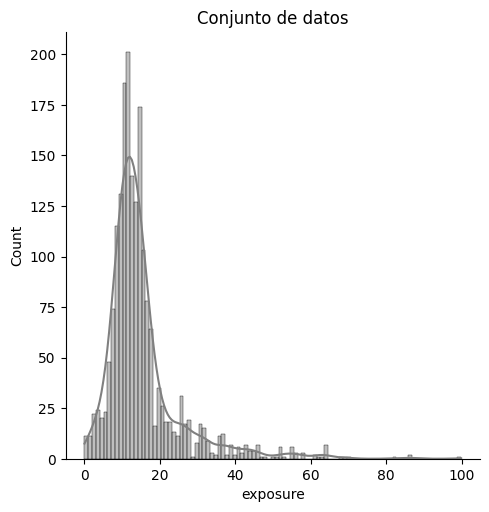

In [14]:
sns.displot(df["exposure"], kde = True, color = "grey")
plt.title('Conjunto de datos');

<Figure size 800x400 with 0 Axes>

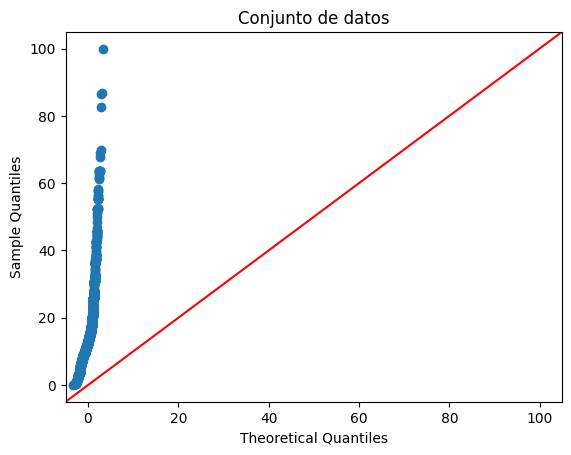

In [15]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df["exposure"], line ='45')
plt.title('Conjunto de datos');

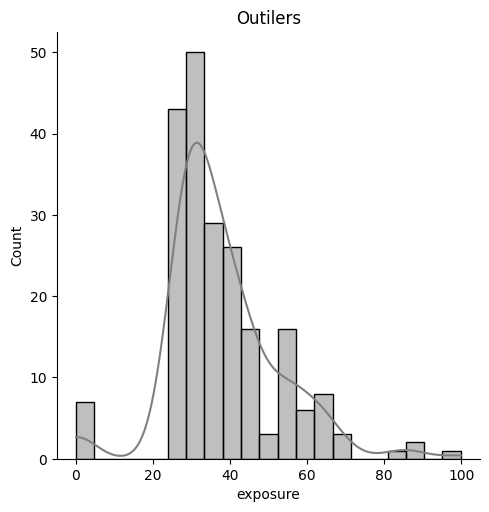

In [16]:
sns.displot(outliers["exposure"], kde = True, color = "grey")
plt.title('Outilers');

<Figure size 800x400 with 0 Axes>

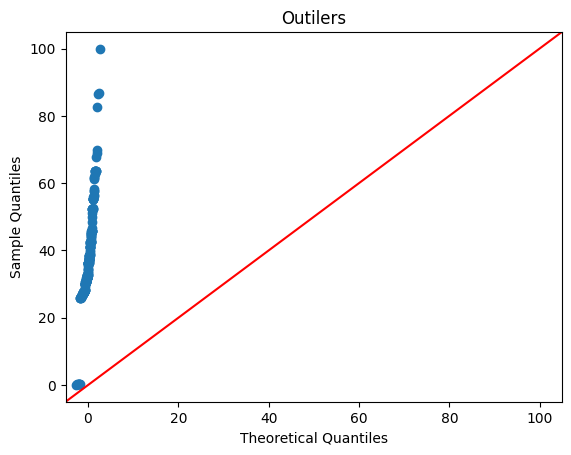

In [17]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(outliers["exposure"], line ='45')
plt.title('Outilers');

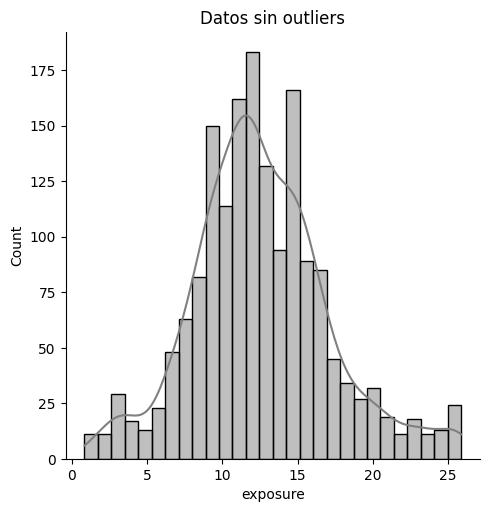

In [18]:
sns.displot(df_limpio["exposure"], kde = True, color = "grey")
plt.title('Datos sin outliers');

<Figure size 800x400 with 0 Axes>

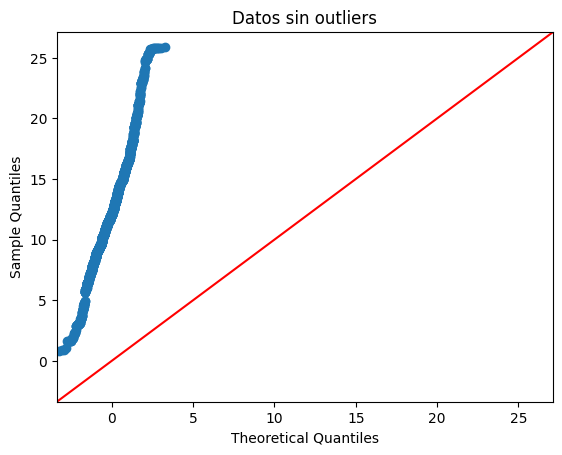

In [19]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df_limpio["exposure"], line ='45')
plt.title('Datos sin outliers');

Nuestra variable respuesta no es normal, sin embargo al quitar los outliers tiende un poco mas a la normalidad.

### Correlación - Independencia

In [20]:
df.columns

Index(['region', 'wri', 'exposure', 'vulnerability', 'susceptibility',
       'lack_of_coping_capabilities', 'lack_of_adaptive_capacities', 'year',
       'exposure_category', 'wri_category', 'vulnerability_category',
       'susceptibility_category'],
      dtype='object')

In [21]:
crosstab, test_results, expected = rp.crosstab(df["exposure_category"], df["wri_category"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [22]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,2212.1731
1,p-value =,0.0000
2,Cramer's V =,0.5373


Como el p-valor de estas variables es 0.0000, es menor a 0.05 con lo cual podemos rechazamos H0 y por lo cual podemos inferir que las variables wri_cagegory y exposure_category son dependientes entre ellas, es decir a mayor categoria del WRI mayor exposure a desastres naturales.

In [23]:
crosstab2, test_results2, expected = rp.crosstab(df["exposure_category"], df["vulnerability_category"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [24]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,342.6556
1,p-value =,0.0000
2,Cramer's V =,0.2116


Como el p-valor es también 0 podemos determinar que las variables son dependientes. Es decir que existe una relación entre la categoría de exposure y de vulnerabilidad.

### Homogeneidad

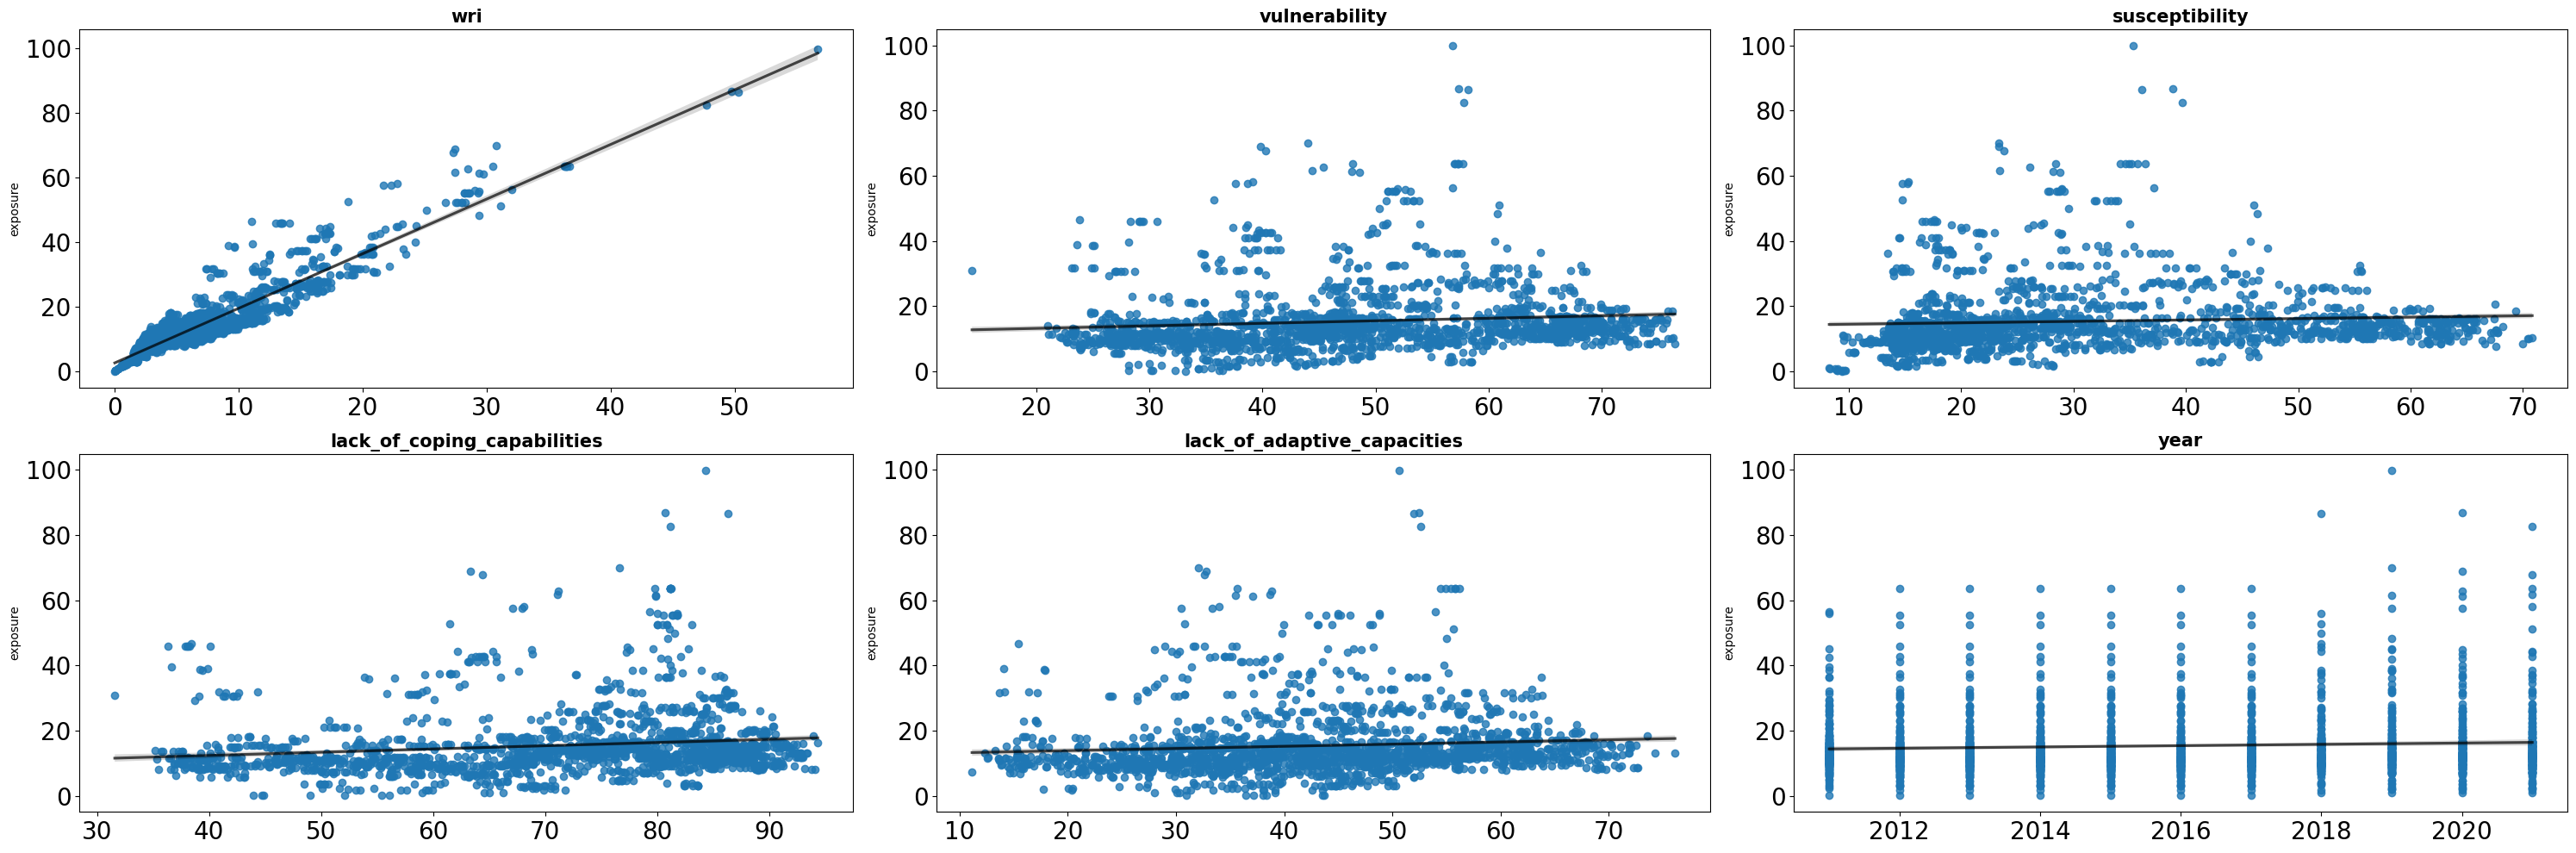

In [26]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('exposure', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'exposure',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

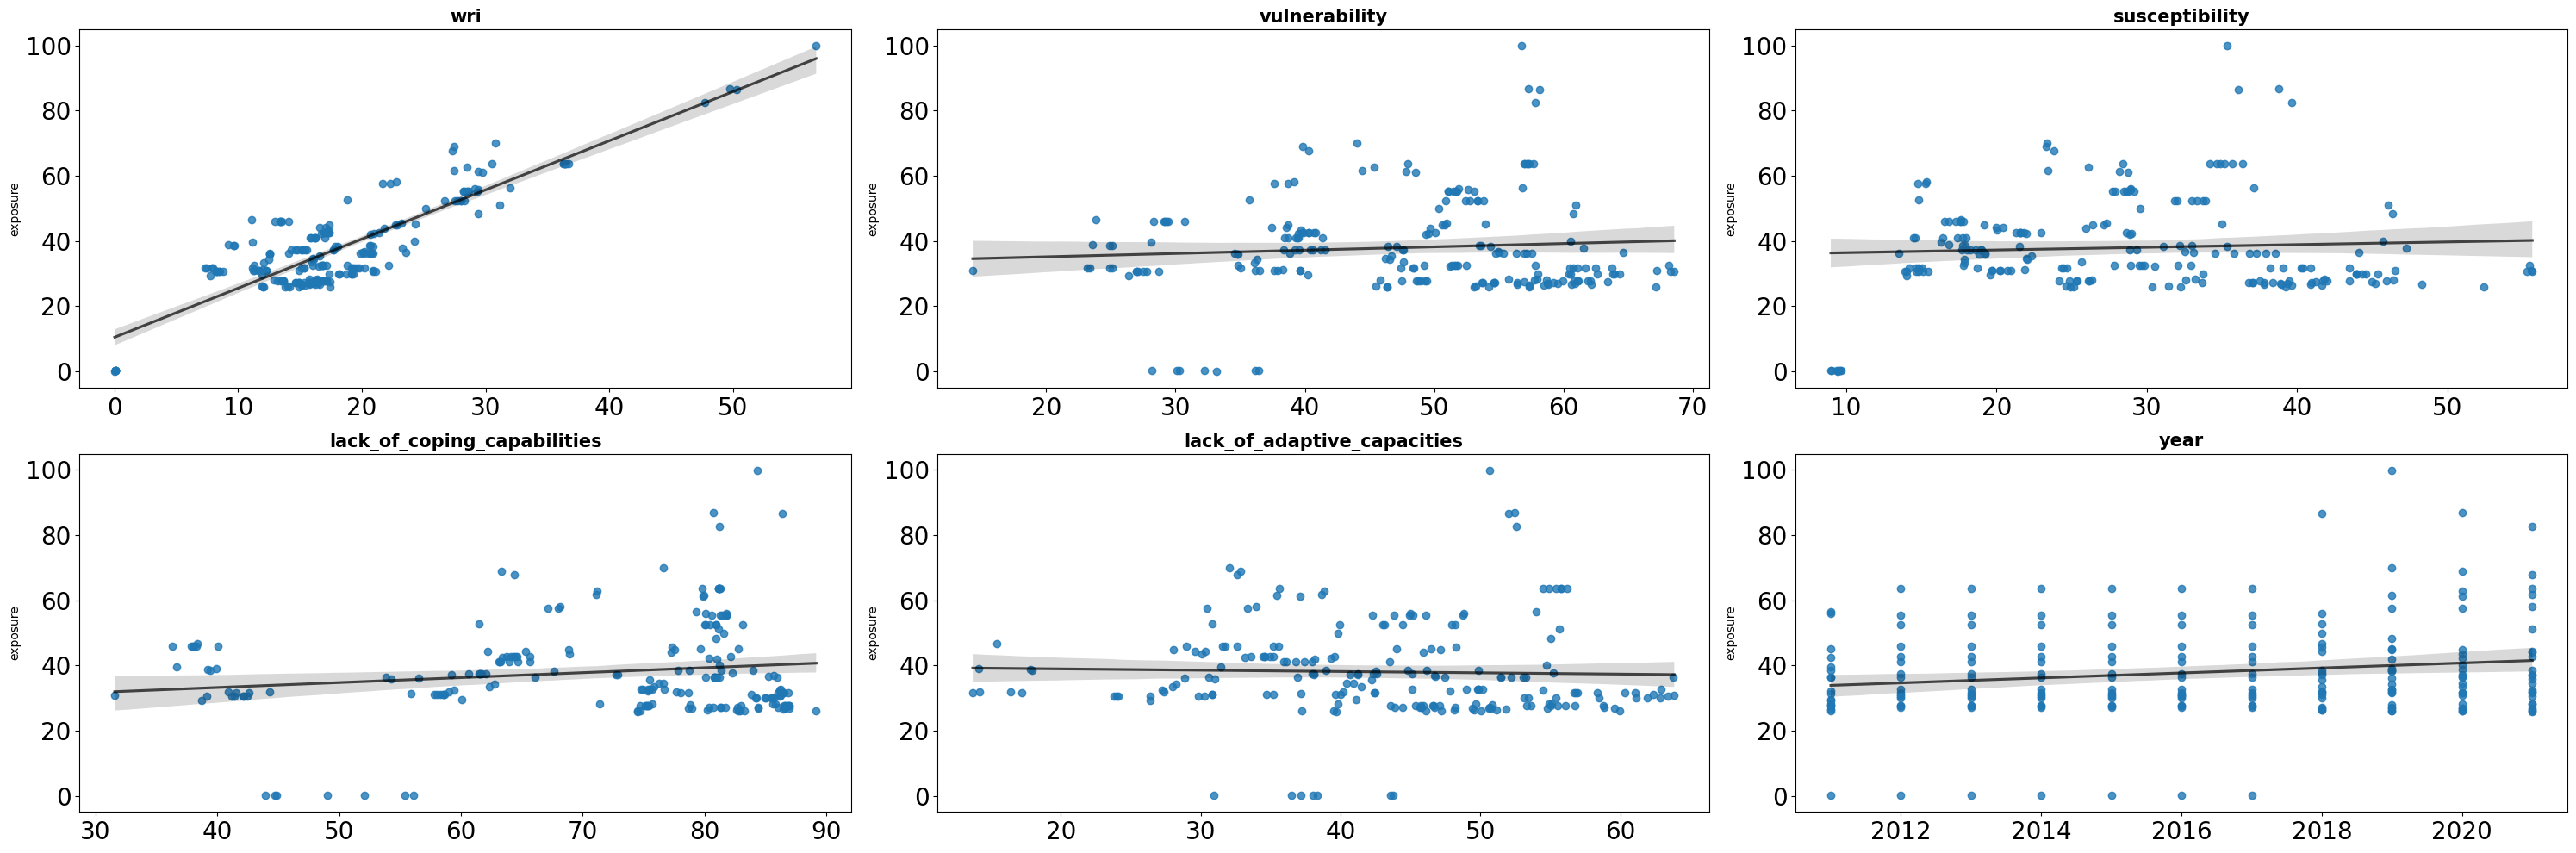

In [27]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('exposure', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = outliers,
        x = colum,
        y = 'exposure',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

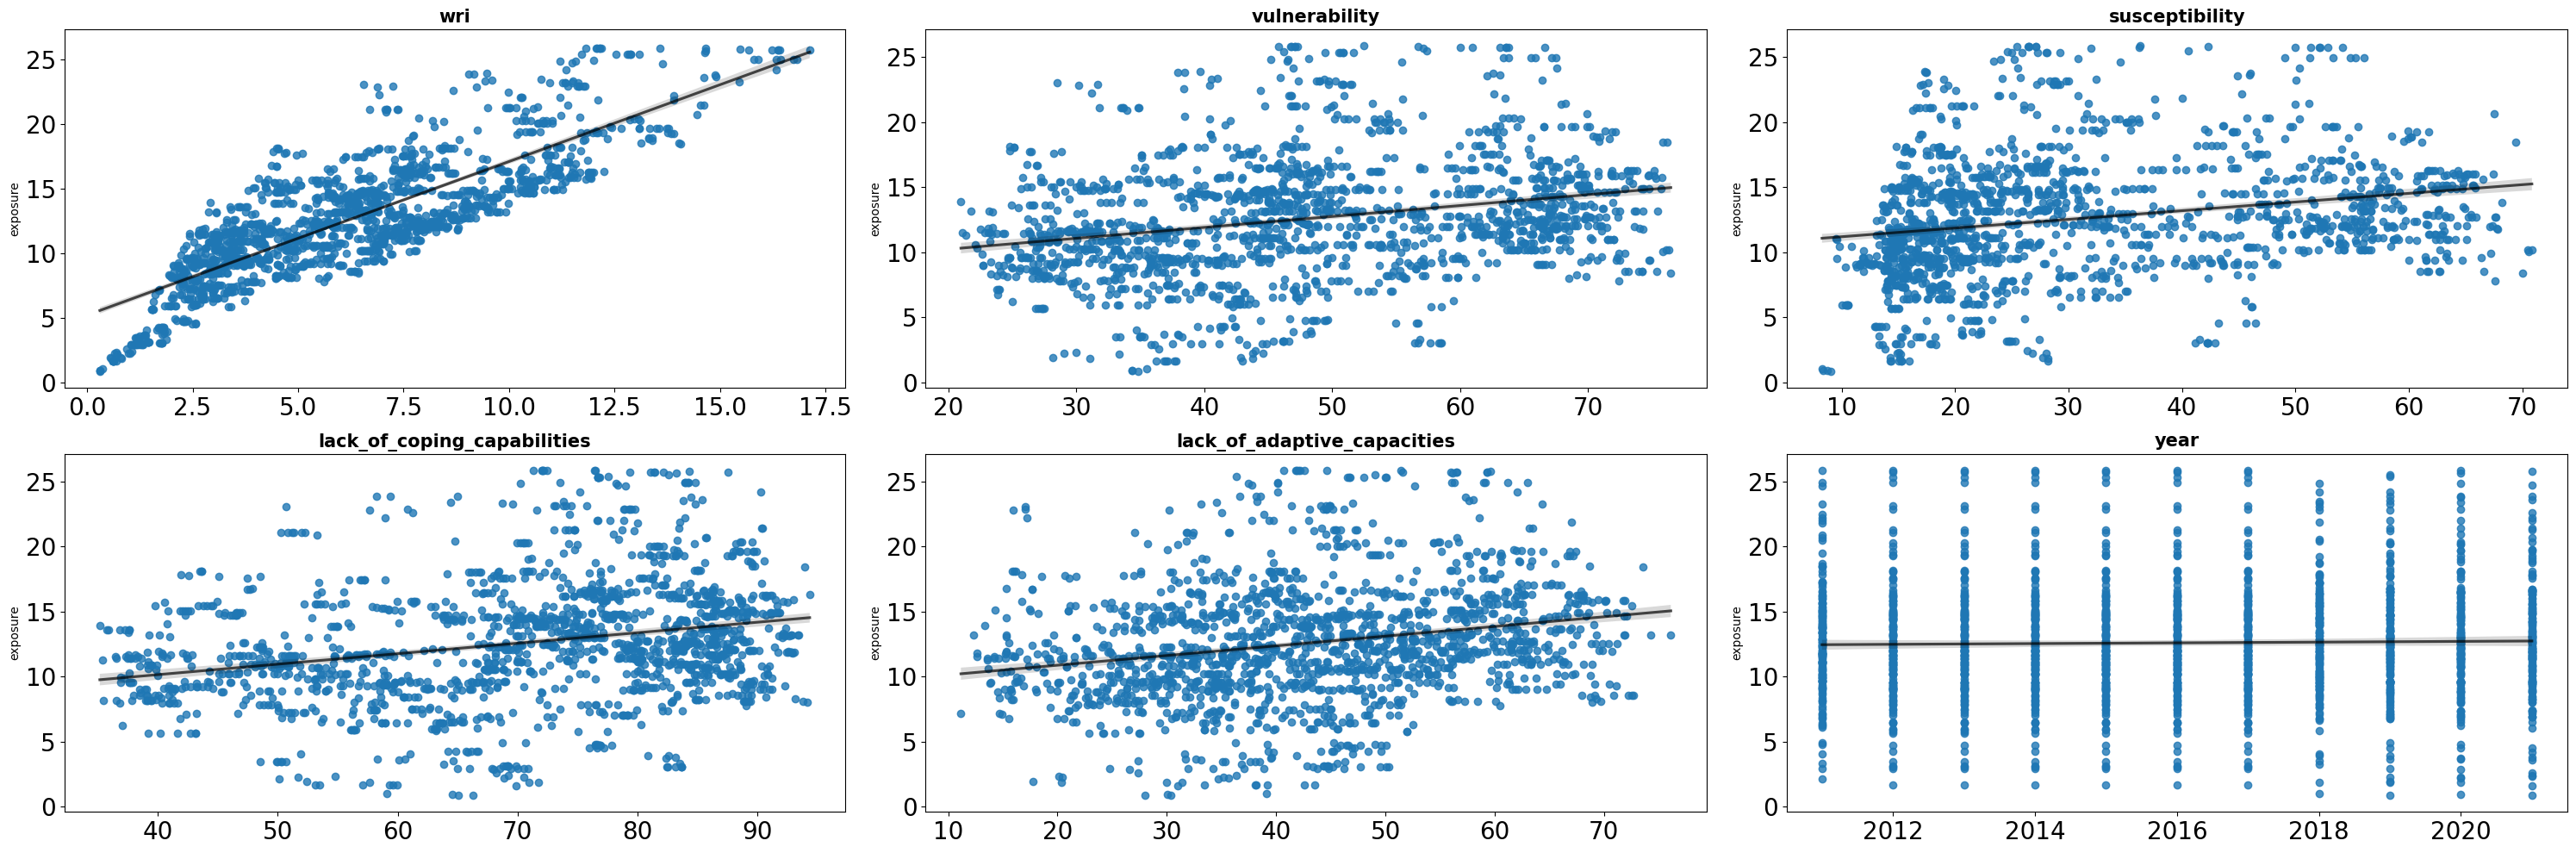

In [28]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('exposure', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df_limpio,
        x = colum,
        y = 'exposure',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [31]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("exposure", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.exposure, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

resultados

{'wri': 2.1501106833819567e-25,
 'vulnerability': 1.6044650114051838e-94,
 'susceptibility': 1.8291721562153031e-93,
 'lack_of_coping_capabilities': 2.2532859502429167e-98,
 'lack_of_adaptive_capacities': nan,
 'year': 1.9433756273023244e-55}

In [32]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df_limpio.select_dtypes(include = np.number).drop("exposure", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df_limpio[col], df_limpio.exposure, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

resultados

{'wri': 5.20225992621115e-25,
 'vulnerability': 1.629830566593073e-301,
 'susceptibility': 3.1262729324522067e-218,
 'lack_of_coping_capabilities': 7.41073991560912e-265,
 'lack_of_adaptive_capacities': 1.4035901321139702e-281,
 'year': 2.983385476766223e-18}

Todos nuestros p-valores son menores a 0.05, con lo cual acpetamos HO y por lo tanto no cumplen la asunción de homocedasticidad y son heterocedasticos.
En las gráficas podemos ver que los únicos que podrían ser relativamente homocedasticos son wri y exposure.
